# Simplest use case

## Running a model from the config file

Setting up the `dolphin` ecosystem:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_error_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Config file format

The 'config_{lens_name}.yml' file provides you options to set up the lens model. Here is the content of the config file that is used in the example model below.

### create a `Processor` instance and point to the IO directory

In [7]:
from dolphin.processor import Processor 
import dolphin
print(dolphin.processor.__file__)

processor = Processor('../io_directory_example/')


/Users/chinyi/Desktop/dolphin/dolphin/processor/__init__.py


### Run a model by calling the  `swim()` method

In [8]:
processor.swim(lens_name='lens_system3', model_id='example3', log=False)

Computing the PSO ...
10
Max iteration reached! Stopping.
-13.26070778254482 reduced X^2 of best position
-223834.11701546528 logL
33759 effective number of data points
[{'theta_E': 1.0016917962124112, 'gamma': 2.0, 'e1': -0.025583087902683373, 'e2': -0.04971705629308167, 'center_x': 0.07675410918722325, 'center_y': -0.10461915778824744}, {'gamma_ext': 0.0017840741643485056, 'psi_ext': 0.010154447899436795, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'n_max': 2, 'beta': 0.149418473463826, 'center_x': -0.22999455451019507, 'center_y': -0.08488302534108388}, {'amp': 1, 'n_max': 2, 'beta': 0.15046820315894652, 'center_x': -0.22999455451019507, 'center_y': -0.08488302534108388}] source result
[{'amp': 1, 'R_sersic': 0.22265496944845536, 'n_sersic': 4.0, 'e1': 0.028031550107879964, 'e2': 0.03316728064747448, 'center_x': 0.03799084724858922, 'center_y': -0.044655169174858546}, {'amp': 1, 'R_sersic': 0.21301448423086428, 'n_sersic': 3.5, 'e1': 0.05106166944216911, 'e2': -0.051167337335283

  0%|          | 0/10 [00:00<?, ?it/s]/Users/chinyi/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10/10 [02:01<00:00, 12.18s/it]

Computing the MCMC...
Number of walkers =  52
Burn-in iterations:  0
Sampling iterations (in current run): 10
138.68521809577942 time taken for MCMC sampling


## Let's check the output

In [9]:
from dolphin.analysis.output import Output

output = Output('../io_directory_example/')

-8.605004187761269 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  10.934537154543458
reduced chi^2 of data  1 =  6.275471220979077
-8.605004187761269 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  10.934537154543458
reduced chi^2 of data  1 =  6.275471220979077


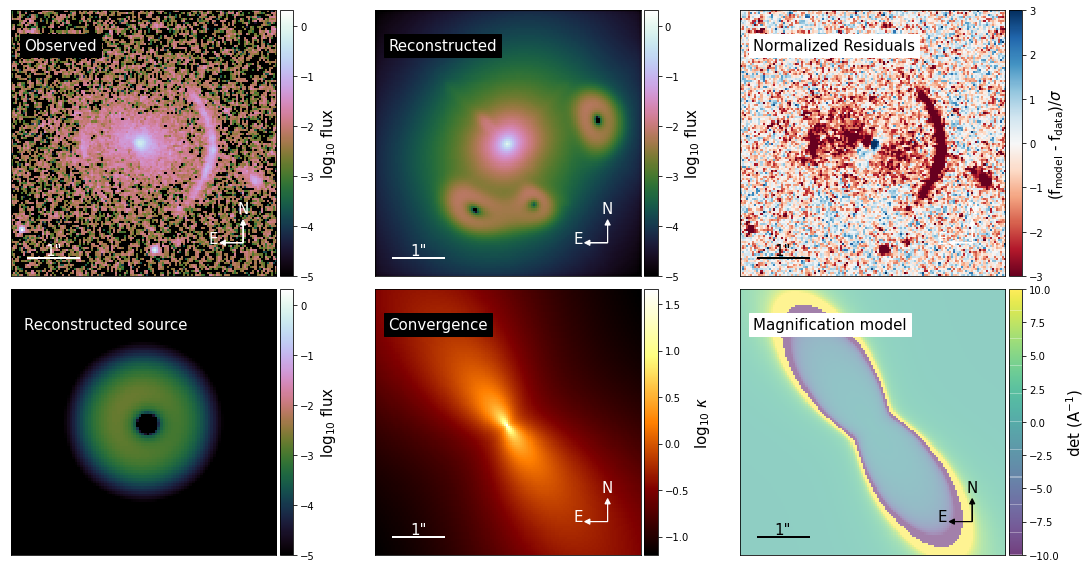

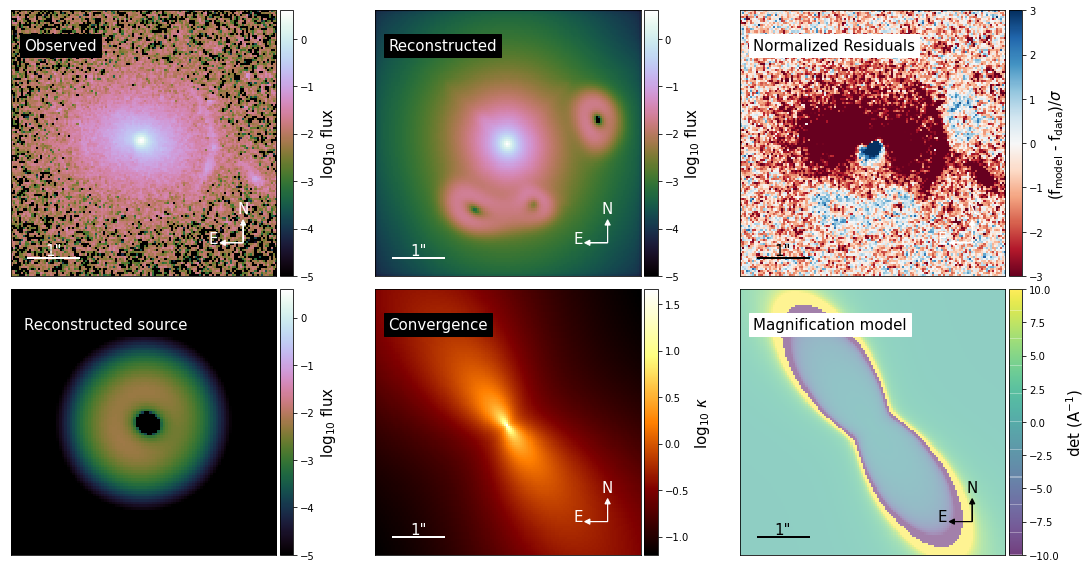

In [10]:
fig = output.plot_model_overview(lens_name='lens_system3', model_id='example3',band_index=0)
fig2 = output.plot_model_overview(lens_name='lens_system3', model_id='example3',band_index=1)

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

In [11]:
output.load_output(lens_name='lens_system3', model_id='example3')

output.kwargs_result

{'kwargs_lens': [{'theta_E': 1.1330184704423352,
   'gamma': 2.001440427509256,
   'e1': -0.1024794187376399,
   'e2': 0.2731573309913737,
   'center_x': 0.03624412094262451,
   'center_y': -0.09878662339811582},
  {'gamma_ext': 0.0031206998184767644,
   'psi_ext': 0.06193191073985046,
   'ra_0': 0,
   'dec_0': 0}],
 'kwargs_source': [{'amp': 1,
   'n_max': 2,
   'beta': 0.14904495203758938,
   'center_x': -0.3835787177101656,
   'center_y': -0.28842411824472824},
  {'amp': 1,
   'n_max': 2,
   'beta': 0.15302628926682144,
   'center_x': -0.3835787177101656,
   'center_y': -0.28842411824472824}],
 'kwargs_lens_light': [{'amp': 1,
   'R_sersic': 0.2580770703483557,
   'n_sersic': 4.0,
   'e1': -0.07528904058667384,
   'e2': -0.09377344386224648,
   'center_x': 0.03170138469141736,
   'center_y': -0.03716638998317877},
  {'amp': 1,
   'R_sersic': 0.24813848069596153,
   'n_sersic': 3.5,
   'e1': 0.27427423155658603,
   'e2': -0.08111188634717556,
   'center_x': 0.03170138469141736,
   'c

When necessary, the settings of the model run---that was read out of the 'config_{lens_name}.yml' file---can be accessed through the `output.model_settings` variable.

In [12]:
output.model_settings

{'system_name': 'lens_system3',
 'band': ['F475X', 'F600LP'],
 'pixel_size': 0.04,
 'model': {'lens': ['SPEP', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE', 'SERSIC_ELLIPSE'],
  'source_light': ['SHAPELETS']},
 'lens_option': {'centroid_init': [0.04, -0.04]},
 'lens_light_option': {'fix': {'0': {'n_sersic': 4.0},
   '1': {'n_sersic': 3.5}}},
 'source_light_option': {'n_max': [2, 2]},
 'kwargs_constraints': None,
 'fitting': {'pso': True,
  'pso_settings': {'num_particle': 10, 'num_iteration': 10},
  'sampling': True,
  'sampler': 'MCMC',
  'mcmc_settings': {'burnin_step': 0,
   'iteration_step': 10,
   'walker_ratio': 2}},
 'numeric_option': {'supersampling_factor': [2]}}